from 
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [82]:
#perform forecast

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]   # for running list
"train={}, test={}".format(type(train),type(test))
"train.size={}, test.size={}, len(history)={}".format(train.size,test.size,len(history))

"train=<class 'numpy.ndarray'>, test=<class 'numpy.ndarray'>"

'train.size=23, test.size=12, len(history)=23'

predicted=326.860786, expected=339.700000
predicted=391.723486, expected=440.400000
predicted=353.007301, expected=315.900000
predicted=385.696557, expected=439.300000
predicted=367.847651, expected=401.300000
predicted=448.604972, expected=437.400000
predicted=401.918004, expected=575.500000
predicted=429.887156, expected=407.600000
predicted=514.777965, expected=682.000000
predicted=442.026581, expected=475.300000
predicted=651.955362, expected=581.300000
predicted=561.306327, expected=646.900000
Test MSE: 6670.446


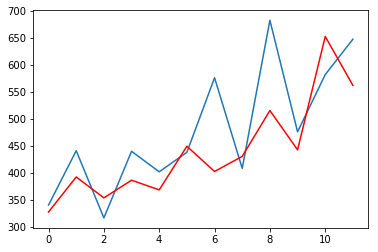

In [81]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))   # lag of 5, 1 degree of difference
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)   
    obs = test[t]
    history.append(obs)   # for arima to compute MOVING average
    print('predicted=%f, expected=%f' % (yhat, obs))
#     print("train.size={}, test.size={}, len(history)={}".format(train.size,test.size,len(history)))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show();

### review autocorrelation
- at 0 lag we're perfectly correlated
- around 12 there's 0 correlation
- starting point for the AR parameter of the model may be 5 (max above dotted boundary)

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


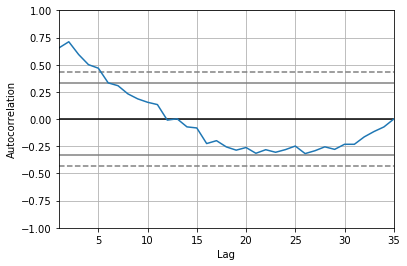

In [16]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show();

In [33]:
# to review model fit
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.266   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -188.279
Method:                       css-mle   S.D. of innovations             59.834
Date:                Mon, 15 Jan 2018   AIC                            390.559
Time:                        04:56:40   BIC                            401.243
Sample:                    03-01-1901   HQIC                           394.203
                         - 12-01-1903                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.5140      3.340      4.046      0.000       6.968      20.060
ar.L1.D.266    -1.1471      0.171     -6.709      0.000      -1.482      -0.812
ar.L2.D.266    -0.6961      0.265     -2.626    

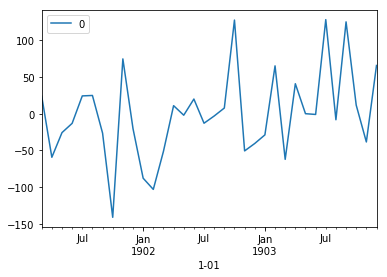

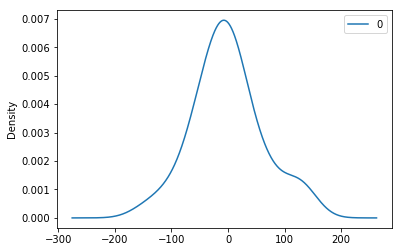

                0
count   34.000000
mean    -0.864540
std     61.112748
min   -141.014189
25%    -36.113770
50%     -2.684264
75%     24.004714
max    127.834600


In [34]:
# plot residual errors
# indicates there's some gaussian (normal distribution) on residuals that could be further corrected
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [35]:
?ARIMA